In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3)
%matplotlib inline

https://www.google.com/search?client=safari&rls=en&q=yeo+johnson+transformation&ie=UTF-8&oe=UTF-8

In [2]:
from math import *
from sklearn.metrics import *

import statsmodels.api as sm
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
import pylab 
import joblib
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Loading the dataset ...

In [4]:
df_wid = pd.read_csv('widening.csv')
df_nar = pd.read_csv('narrowing.csv')
df_wid.drop(['Unnamed: 0','ColTime'],axis=1,inplace=True)
df_nar.drop(['Unnamed: 0','ColTime'],axis=1,inplace=True)

### Dataset Information

- Response variable is **Acceleration**
- Independent variables data definition are as follows
- id : vehicle id
- subjtype - 1 (tw), 2 car
- strict leader type: 1 tw, 2 car, 3+ other
- Sideleader type: 1 tw, 2 car, 3+ other
- log acc is log of **acceleration** 
- log abs speed is log of speed of subj vehicle
- log S is log of spacing between leader and follower
- log deltav is log of speed difference between follower and leader

In [5]:
df_wid.head()

,Acc,AbsSpd,S,DeltaV,Type-Car,Type-TW,SLType-Car,SLType-TW,Category-Left,Category-NoLead,Category-Right
0,0.754,12.549,11.503,0.092,0,1,0,1,0,1,0
1,2.657,11.684,6.135,4.808,0,1,0,1,0,1,0
2,1.669,12.311,8.152,0.389,0,1,0,1,0,1,0
3,1.258,12.986,12.444,2.004,0,1,0,1,0,1,0
4,1.427,12.165,5.068,1.973,0,1,0,1,0,1,0


In [6]:
df_nar.head()

,Acc,AbsSpd,S,DeltaV,Type-Car,Type-TW,SLType-Car,SLType-TW,Category-Left,Category-NoLead,Category-Right
0,-1.766,14.652,7.407,-1.221,0,0,1,0,0,1,0
1,-1.429,13.398,7.784,-0.416,0,1,0,1,0,1,0
2,-1.265,14.295,18.270,-0.211,0,1,0,1,0,1,0
3,-1.976,12.821,2.319,-2.059,0,1,0,1,0,1,0
4,-0.124,12.871,2.094,-2.026,0,1,0,1,0,1,0


In [7]:
# dct = {}
# dct['Random State']  = []
# dct['XGBR_Train']    = []
# dct['RF_Train']      = []
# dct['SVR_Train']     = []
# dct['LR_Train']      = []

# dct['XGBR_Test']     = []
# dct['RF_Test']       = []
# dct['SVR_Test']      = []
# dct['LR_Test']       = []

# for i in range(0,100,5):
#     X = df_wid[['DeltaV','S','AbsSpd']]
#     y = df_wid['Acc']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
#     xgbr = XGBRegressor(colsample_bytree = 0.8,learning_rate =0.2,max_depth =15,
#         min_child_weight = 18,n_estimators = 50,subsample = 0.84)

#     xgbr.fit(X_train,y_train,early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)
    
#     dct['XGBR_Train'].append(xgbr.score(X_train,y_train))
#     dct['XGBR_Test'].append(xgbr.score(X_test,y_test))
    
#     rf = RandomForestRegressor(random_state=10,n_estimators = 100,
#                           max_depth=20, min_samples_leaf=10,min_samples_split=10)
#     rf.fit(X_train,y_train)
    
#     dct['RF_Train'].append(rf.score(X_train,y_train))
#     dct['RF_Test'].append(rf.score(X_test,y_test))
    
#     svr = SVR(kernel='rbf')
#     svr.fit(X_train,y_train)
    
#     dct['SVR_Train'].append(svr.score(X_train,y_train))
#     dct['SVR_Test'].append(svr.score(X_test,y_test))
    
#     lr = LinearRegression()
#     lr.fit(X_train,y_train)
    
#     dct['LR_Train'].append(lr.score(X_train,y_train))
#     dct['LR_Test'].append(lr.score(X_test,y_test))
    
#     dct['Random State'].append(i)
    
# df_dct = pd.DataFrame(dct)

In [8]:
# plt.figure(figsize=(12,7))
# plt.plot(df_dct['Random State'],df_dct['XGBR_Test'],label="XGBR_score")
# plt.plot(df_dct['Random State'],df_dct['RF_Test'],label="RF_score")
# plt.plot(df_dct['Random State'],df_dct['SVR_Test'],label="SVR_score")
# plt.plot(df_dct['Random State'],df_dct['LR_Test'],label="LinearRegression_score")

# plt.title("Random state vs score: Test data",size=18)
# plt.xlabel("Random State",size=15,c='b')
# plt.ylabel("R2_score",size=15,c='b')
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)
# plt.legend()
# plt.show()

## Model building Accleration Gap Widening

In [9]:
# Best random state 50

In [10]:
X = df_wid.drop(['Acc'],axis=1)
y = df_wid['Acc']

attributes = X.columns
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = attributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=65)

xgbr = XGBRegressor(colsample_bytree = 0.8,learning_rate =0.2,max_depth =15,
        min_child_weight = 18,n_estimators = 50,subsample = 0.84)

xgbr.fit(X_train,y_train,early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)


svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

rf = RandomForestRegressor(random_state=10,n_estimators = 100,
                          max_depth=15, min_samples_leaf=20,min_samples_split=20)
rf.fit(X_train,y_train)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

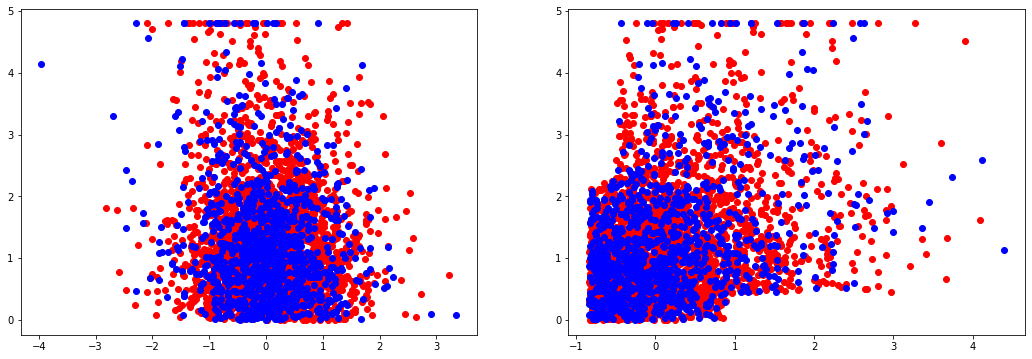

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.scatter(X_train['AbsSpd'],y_train,c='r')
plt.scatter(X_test['AbsSpd'],y_test,c='b')

plt.subplot(1,2,2)
plt.scatter(X_train['DeltaV'],y_train,c='r')
plt.scatter(X_test['DeltaV'],y_test,c='b')
plt.show()

## Saving the unbinned models

In [12]:
joblib.dump(lr, 'lr_unbin_wid.pkl')
joblib.dump(svr, 'svr_unbin_wid.pkl')
joblib.dump(rf, 'rf_unbin_wid.pkl')
joblib.dump(xgbr, 'xgbr_unbin_wid.pkl')

['xgbr_unbin_wid.pkl']

In [13]:
xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)



dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']

dct1 = {}
dct1['XGBR'] = list(xgbr.feature_importances_)
dct1['RF']   = list(rf.feature_importances_)
dct1['SVR']  = list(svr.coef_[0])
dct1['LR']   = list(lr.coef_)

df_fi = pd.DataFrame(dct1).T
df_fi.columns = X.columns
df_res

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.411,0.110,0.760,0.942,0.571,0.717
RF,0.251,0.155,0.857,0.918,0.658,0.712
SVR,0.045,0.066,0.968,0.965,0.704,0.700
LR,0.103,0.147,0.938,0.922,0.725,0.711


In [14]:
df_fi.T

,XGBR,RF,SVR,LR
AbsSpd,0.079,0.182,0.031,-0.022
S,0.078,0.170,-0.054,-0.075
DeltaV,0.126,0.563,0.311,0.398
Type-Car,0.137,0.009,-0.004,0.048
Type-TW,0.135,0.013,0.034,0.200
SLType-Car,0.095,0.005,0.120,-0.062
SLType-TW,0.135,0.034,-0.120,-0.340
Category-Left,0.072,0.004,-0.016,0.076
Category-NoLead,0.067,0.012,-0.004,0.119
Category-Right,0.076,0.009,0.007,0.121


In [15]:
df_wid1 = df_wid.copy()
scaler = RobustScaler()
# df_wid1['DeltaV'] = scaler.fit_transform(np.array(df_wid1['DeltaV']).reshape(-1,1))
# df_wid1['S']      = scaler.fit_transform(np.array(df_wid1['S']).reshape(-1,1))
# df_wid1['AbsSpd'] = scaler.fit_transform(np.array(df_wid1['AbsSpd']).reshape(-1,1))

sm_X = df_wid1.drop(['Acc'],axis=1)
sm_y = df_wid1['Acc']

attributes = sm_X.columns
scaler = RobustScaler()
sm_X = pd.DataFrame(scaler.fit_transform(sm_X))
sm_X.columns = attributes

model = sm.OLS(sm_y, sm_X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Acc   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              679.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):                        0.00
Time:                        12:35:02   Log-Likelihood:                         -4811.5
No. Observations:                3539   AIC:                                      9643.
Df Residuals:                    3529   BIC:                                      9705.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

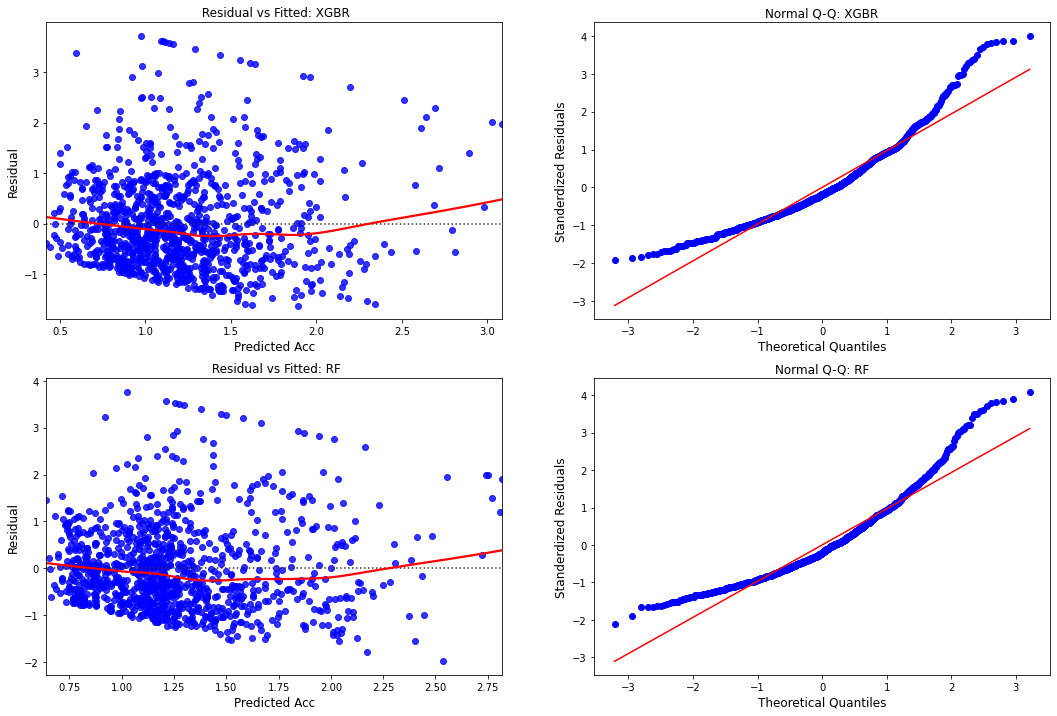

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
xgbr_res = np.array((y_test-xgbr_pred))
sns.residplot(xgbr_pred,xgbr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: XGBR")

plt.subplot(2,2,2)
xgbr_stan = (xgbr_res - np.mean(xgbr_res))/np.std(xgbr_res)
stats.probplot(xgbr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: XGBR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
rf_res = np.array((y_test-rf_pred))
sns.residplot(rf_pred,rf_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: RF")

plt.subplot(2,2,4)
rf_stan = (rf_res - np.mean(rf_res))/np.std(rf_res)
stats.probplot(rf_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: RF")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

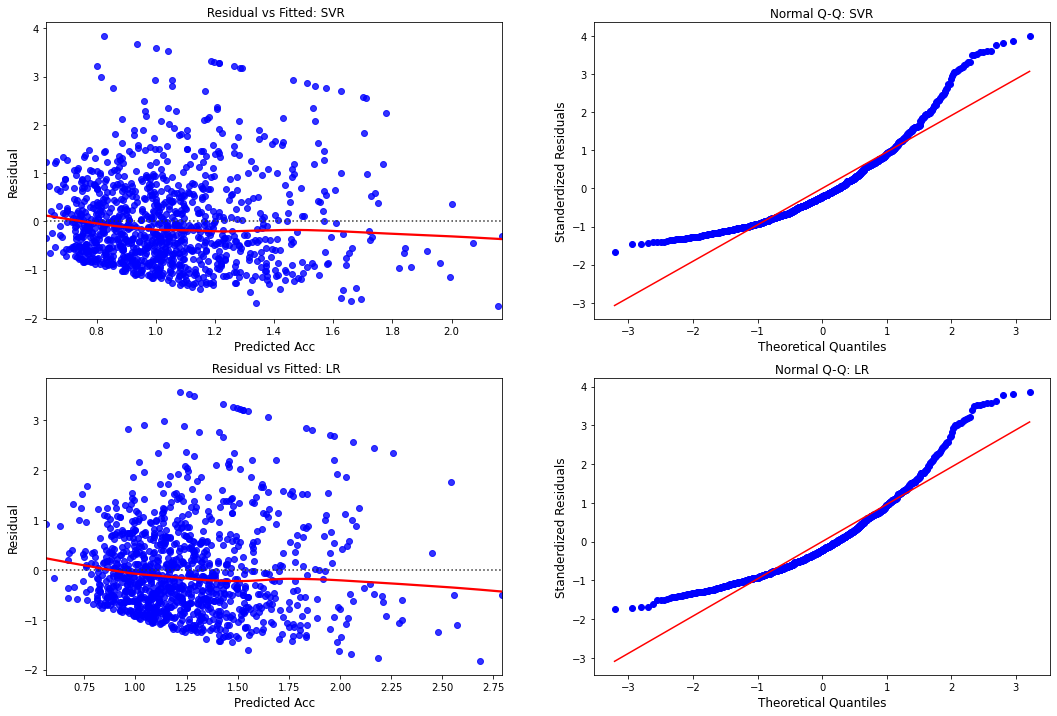

In [17]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
svr_res = np.array((y_test-svr_pred))
sns.residplot(svr_pred,svr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: SVR")

plt.subplot(2,2,2)
svr_stan = (svr_res - np.mean(svr_res))/np.std(svr_res)
stats.probplot(svr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: SVR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
lr_res = np.array((y_test-lr_pred))
sns.residplot(lr_pred,lr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: LR")

plt.subplot(2,2,4)
lr_stan = (lr_res - np.mean(lr_res))/np.std(lr_res)
stats.probplot(lr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: LR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

## Loading the Binned models

In [18]:
xgbr = joblib.load('xgbr_bin_wid.pkl')
rf   = joblib.load('rf_bin_wid.pkl')
svr  = joblib.load('svr_bin_wid.pkl')
lr   = joblib.load('lr_bin_wid.pkl')

xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)



dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']
df_res

# dct1 = {}
# dct1['XGBR'] = list(xgbr.feature_importances_)
# dct1['RF']   = list(rf.feature_importances_)
# dct1['SVR']  = list(svr.coef_[0])
# dct1['LR']   = list(lr.coef_)

# df_fi = pd.DataFrame(dct1).T
# df_fi.columns = X.columns
# df_fi

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.015,0.037,0.983,0.980,0.770,0.765
RF,0.019,0.040,0.981,0.978,0.761,0.761
SVR,0.043,0.061,0.969,0.967,0.740,0.741
LR,0.020,0.058,0.981,0.969,0.742,0.733


## Model building Acceleration Gap Narrowing

In [19]:
X = df_nar.drop(['Acc'],axis=1)
y = df_nar['Acc']

attributes = X.columns
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = attributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

xgbr = XGBRegressor(colsample_bytree = 0.8,learning_rate =0.1,max_depth =15,
        min_child_weight = 18,n_estimators = 50,subsample = 0.84)
xgbr.fit(X_train,y_train,early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)

svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

rf = RandomForestRegressor(random_state=10,n_estimators = 100,
                          max_depth=15, min_samples_leaf=20,min_samples_split=20)
rf.fit(X_train,y_train)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

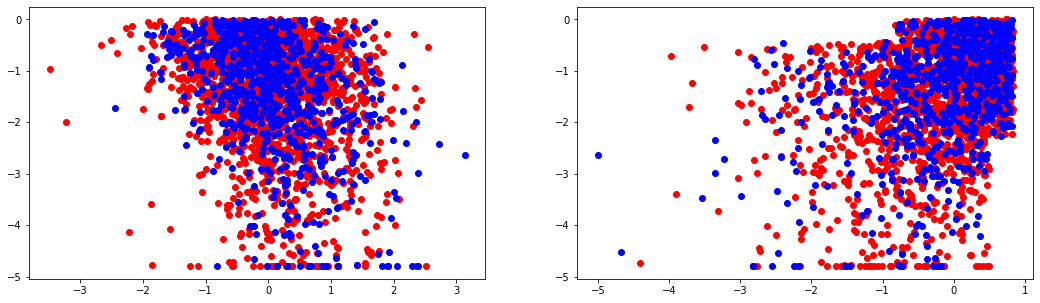

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.scatter(X_train['AbsSpd'],y_train,c='r')
plt.scatter(X_test['AbsSpd'],y_test,c='b')

plt.subplot(1,2,2)
plt.scatter(X_train['DeltaV'],y_train,c='r')
plt.scatter(X_test['DeltaV'],y_test,c='b')
plt.show()

## Saving the models

In [21]:
joblib.dump(lr,  'lr_unbin_nar.pkl')
joblib.dump(svr, 'svr_unbin_nar.pkl')
joblib.dump(rf,  'rf_unbin_nar.pkl')
joblib.dump(xgbr,'xgbr_unbin_nar.pkl')

['xgbr_unbin_nar.pkl']

In [22]:
xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)



dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']

dct1 = {}
dct1['XGBR'] = list(xgbr.feature_importances_)
dct1['RF']   = list(rf.feature_importances_)
dct1['SVR']  = list(svr.coef_[0])
dct1['LR']   = list(lr.coef_)

df_fi = pd.DataFrame(dct1).T
df_fi.columns = X.columns
df_res

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.507,0.145,0.796,0.997,0.608,0.766
RF,0.312,0.188,0.941,0.972,0.732,0.757
SVR,0.149,0.183,1.047,0.975,0.785,0.737
LR,0.177,0.196,1.029,0.967,0.800,0.757


In [23]:
df_fi.T

,XGBR,RF,SVR,LR
AbsSpd,0.107,1.983e-01,-0.225,-0.226
S,0.096,1.685e-01,0.172,0.210
DeltaV,0.197,6.030e-01,0.487,0.489
Type-Car,0.084,8.964e-04,-0.025,-0.037
Type-TW,0.087,2.018e-03,0.025,-0.063
SLType-Car,0.088,4.256e-03,0.084,0.114
SLType-TW,0.089,5.047e-03,-0.033,0.023
Category-Left,0.089,1.776e-03,-0.094,-0.126
Category-NoLead,0.073,1.191e-02,-0.134,-0.135
Category-Right,0.089,4.334e-03,-0.148,-0.126


In [24]:
df_nar1 = df_nar.copy()
scaler = RobustScaler()
# df_nar1['DeltaV'] = scaler.fit_transform(np.array(df_nar1['DeltaV']).reshape(-1,1))
# df_nar1['S']      = scaler.fit_transform(np.array(df_nar1['S']).reshape(-1,1))
# df_nar1['AbsSpd'] = scaler.fit_transform(np.array(df_nar1['AbsSpd']).reshape(-1,1))

sm_X = df_nar1.drop(['Acc'],axis=1)
sm_y = df_nar1['Acc']

attributes = sm_X.columns
scaler = RobustScaler()
sm_X = pd.DataFrame(scaler.fit_transform(sm_X))
sm_X.columns = attributes

model = sm.OLS(sm_y, sm_X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Acc   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              567.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):                        0.00
Time:                        12:35:09   Log-Likelihood:                         -3876.4
No. Observations:                2694   AIC:                                      7773.
Df Residuals:                    2684   BIC:                                      7832.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

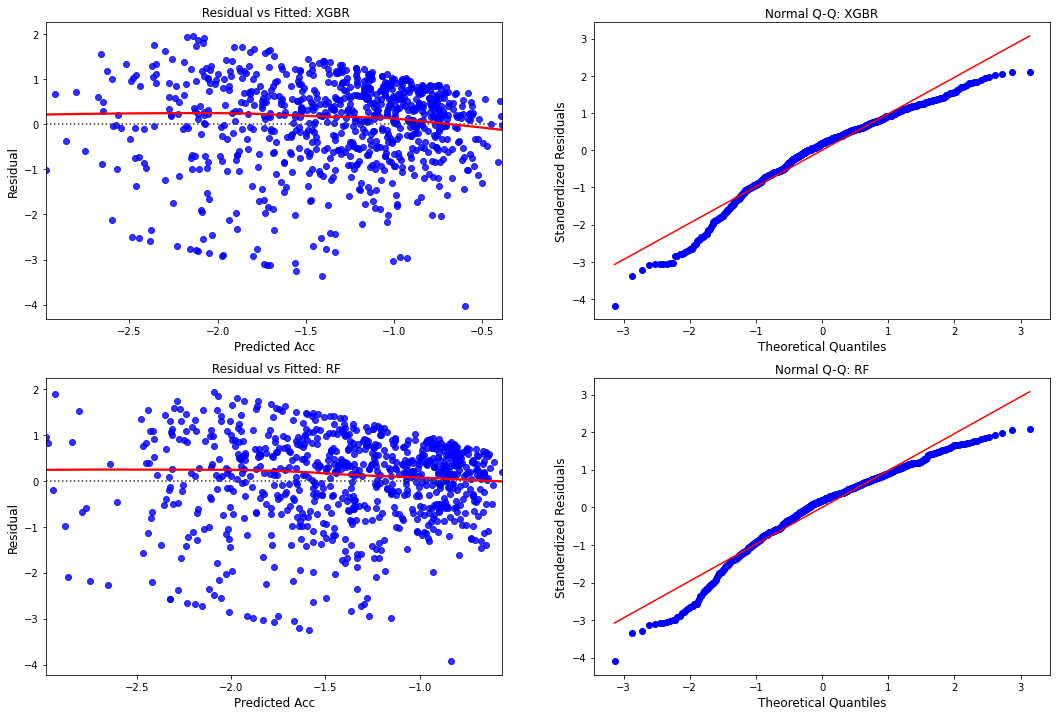

In [25]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
xgbr_res = np.array((y_test-xgbr_pred))
sns.residplot(xgbr_pred,xgbr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: XGBR")

plt.subplot(2,2,2)
xgbr_stan = (xgbr_res - np.mean(xgbr_res))/np.std(xgbr_res)
stats.probplot(xgbr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: XGBR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
rf_res = np.array((y_test-rf_pred))
sns.residplot(rf_pred,rf_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: RF")

plt.subplot(2,2,4)
rf_stan = (rf_res - np.mean(rf_res))/np.std(rf_res)
stats.probplot(rf_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: RF")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

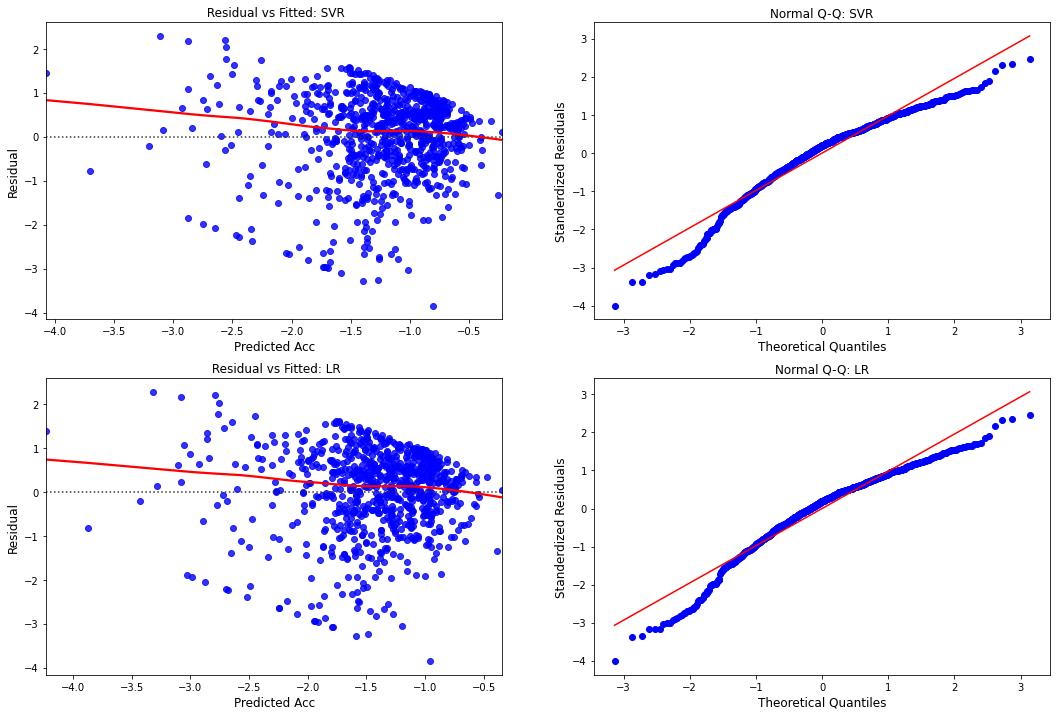

In [26]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
svr_res = np.array((y_test-svr_pred))
sns.residplot(svr_pred,svr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: SVR")

plt.subplot(2,2,2)
svr_stan = (svr_res - np.mean(svr_res))/np.std(svr_res)
stats.probplot(svr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: SVR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
lr_res = np.array((y_test-lr_pred))
sns.residplot(lr_pred,lr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: LR")

plt.subplot(2,2,4)
lr_stan = (lr_res - np.mean(lr_res))/np.std(lr_res)
stats.probplot(lr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: LR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

## Loading the Models

In [27]:
xgbr = joblib.load('xgbr_bin_nar.pkl')
rf   = joblib.load('rf_bin_nar.pkl')
svr  = joblib.load('svr_bin_nar.pkl')
lr   = joblib.load('lr_bin_nar.pkl')

xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)



dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']
df_res

# dct1 = {}
# dct1['XGBR'] = list(xgbr.feature_importances_)
# dct1['RF']   = list(rf.feature_importances_)
# dct1['SVR']  = list(svr.coef_[0])
# dct1['LR']   = list(lr.coef_)

# df_fi = pd.DataFrame(dct1).T
# df_fi.columns = X.columns
# df_fi

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.099,0.145,1.077,0.997,0.842,0.785
RF,0.100,0.152,1.076,0.993,0.844,0.786
SVR,0.117,0.161,1.066,0.988,0.841,0.787
LR,0.099,0.137,1.077,1.002,0.847,0.795


In [28]:
break

SyntaxError: 'break' outside loop (<ipython-input-28-6aaf1f276005>, line 1)

In [ ]:
# xgbr = XGBRegressor(colsample_bytree = 0.8,learning_rate =0.5,max_depth =30,
#         min_child_weight = 30, n_estimators = 100,subsample = 0.7,num_parallel_tree=1)
# xgbr.fit(X_train,y_train,early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)


# xgbr_pred = xgbr.predict(X_test)

# dct = {}
# xgbr_train = round(xgbr.score(X_train,y_train),2)
# xgbr_test = round(xgbr.score(X_test,y_test),2)
# xgbr_RMSE = round(mean_squared_error(y_test,xgbr_pred,squared=False),2)
# xgbr_MAE = round(mean_absolute_error(y_test,xgbr_pred),2)

# dct['XGBR'] = [xgbr_train,xgbr_test,xgbr_RMSE,xgbr_MAE]
# df_res = pd.DataFrame(dct).T
# df_res.columns = ['Train_score','Test_score','RMSE','MAE']
# print(df_res)

In [ ]:
# rf = RandomForestRegressor(random_state=10,n_estimators = 100,
#                           max_depth=35, min_samples_leaf=10,min_samples_split=10)
# rf.fit(X_train,y_train)

# rf_pred   = rf.predict(X_test)

# rf_train = round(rf.score(X_train,y_train),2)
# rf_test = round(rf.score(X_test,y_test),2)
# rf_RMSE = round(mean_squared_error(y_test,rf_pred,squared=False),2)
# rf_MAE = round(mean_absolute_error(y_test,rf_pred),2)

# dct = {}
# dct['RF'] = [rf_train,rf_test,rf_RMSE,rf_MAE]

# df_res = pd.DataFrame(dct).T
# df_res.columns = ['Train_score','Test_score','RMSE','MAE']
# print(df_res)

## hyperparameter tuning

In [ ]:
# param_grid = {'bootstrap': [True], 
#           'max_depth': [18,25,30], 
#           'max_features': ['auto'], 
#           'n_estimators': [75,100,150,200],
#           'min_samples_split':[20,30,50],
#           'min_samples_leaf':[20,30,50],
#           'max_leaf_nodes':[15,20,30],
#           'oob_score':[True]}

# rfr = RandomForestRegressor()

# g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
#                         cv = 3, n_jobs = 1, verbose = 1, return_train_score=True,
#                         scoring = 'neg_mean_squared_error')

# g_search.fit(X_train,y_train)
# print(g_search.best_params_)
# print(round(g_search.score(X_train,y_train),3))
# print(round(g_search.score(X_test,y_test),3))

In [ ]:
params = {'bootstrap': True, 
          'max_depth': 10, 
          'max_features': 'auto', 
          'max_leaf_nodes': 50, 
          'min_samples_leaf': 15, 
          'min_samples_split': 15, 
          'n_estimators': 100, 
          'oob_score': True}
rf_model = RandomForestRegressor(random_state=100, **params)
rf_model.fit(X_train,y_train)
print(np.round(rf_model.score(X_train,y_train),3))
print(np.round(rf_model.score(X_test,y_test),3))
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='bar',title='Random Forest')

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='bar',title='Random Forest')

plt.subplot(1,2,2)
feat_importances = pd.Series(xgbr.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='bar',title='Xgboost')

plt.show()

In [ ]:
plt.figure(figsize=(16,5))

lr = LinearRegression()
X = np.array(df_so['AbsSpd'])
X = X.reshape(-1,1)
y = np.array(df_so['Acc'])
y = y.reshape(-1,1)
lr.fit(X,y)
plt.subplot(1,2,1)
plt.scatter(X,y)
plt.annotate(f"R2 = {round(lr.score(X,y),3)}",xy=(18,4),c='r',size=15)
plt.annotate(f"RMSE = {round(mean_squared_error(y,lr.predict(X),squared=True),3)}",xy=(18,3),c='g',size=15)
plt.title('Absoulte Speed vs Acceleration')

plt.subplot(1,2,2)
lr = LinearRegression()
X = np.array(df_so['DeltaV'])
X = X.reshape(-1,1)
y = np.array(df_so['Acc'])
y = y.reshape(-1,1)
lr.fit(X,y)
plt.scatter(X,y)
plt.annotate(f"R2 = {round(lr.score(X,y),3)}",xy=(-6,2),c='r',size=15)
plt.annotate(f"RMSE = {round(mean_squared_error(y,lr.predict(X),squared=True),3)}",xy=(-6,1),c='g',size=15)
plt.title('Relative Velocity vs Acceleration')
plt.show()

In [ ]:
break